In [72]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [73]:
df=pd.read_csv("heart.csv")

In [74]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [76]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [77]:
df.duplicated().sum()

1

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

In [80]:
df.describe().T

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trtbps    302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalachh  302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exng      302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slp       302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
caa       302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thall     302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0
output    302.0    0.543046   0.498970    0.0    0.00    1.0    1.00    1.0

C:\Users\mahazoya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


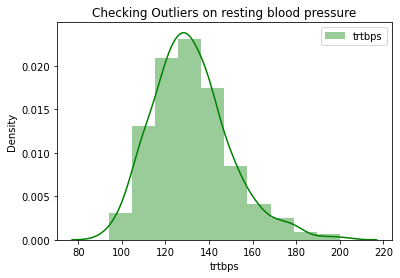

In [81]:
sns.color_palette("pastel")
plt.title('Checking Outliers on resting blood pressure')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()

C:\Users\mahazoya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


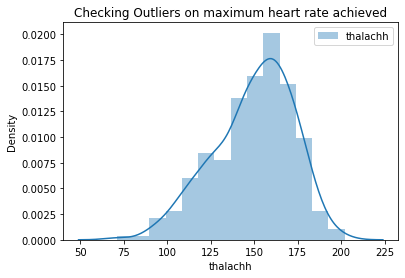

In [82]:
plt.title('Checking Outliers on maximum heart rate achieved')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

C:\Users\mahazoya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


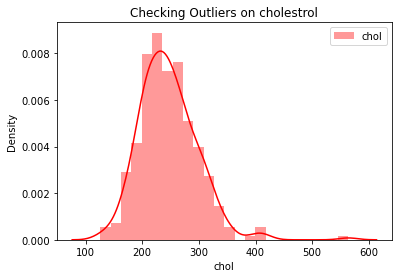

In [83]:
plt.title('Checking Outliers on cholestrol')
sns.distplot(df.chol, label='chol', kde=True, color='red')
plt.legend()

<AxesSubplot:xlabel='cp', ylabel='count'>

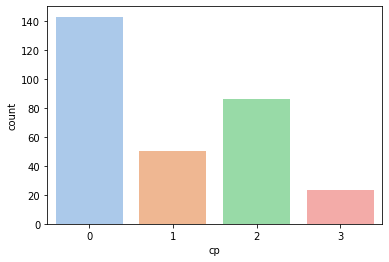

In [84]:
ax=plt.axis()
sns.countplot(x='cp', data=df, palette='pastel')

<AxesSubplot:xlabel='caa', ylabel='age'>

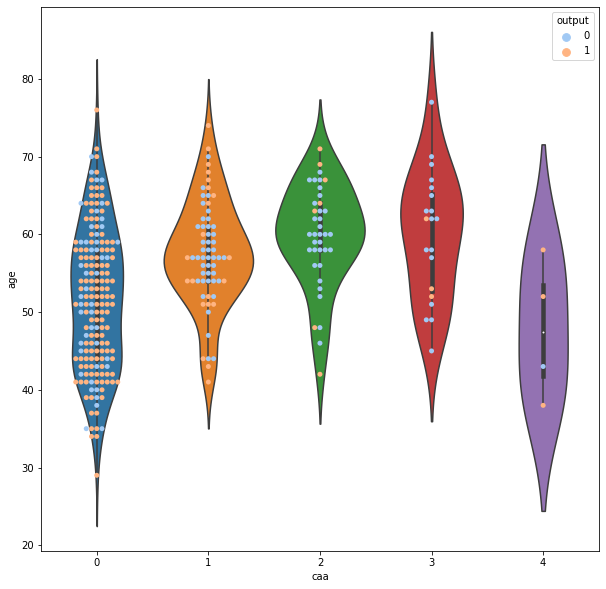

In [85]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

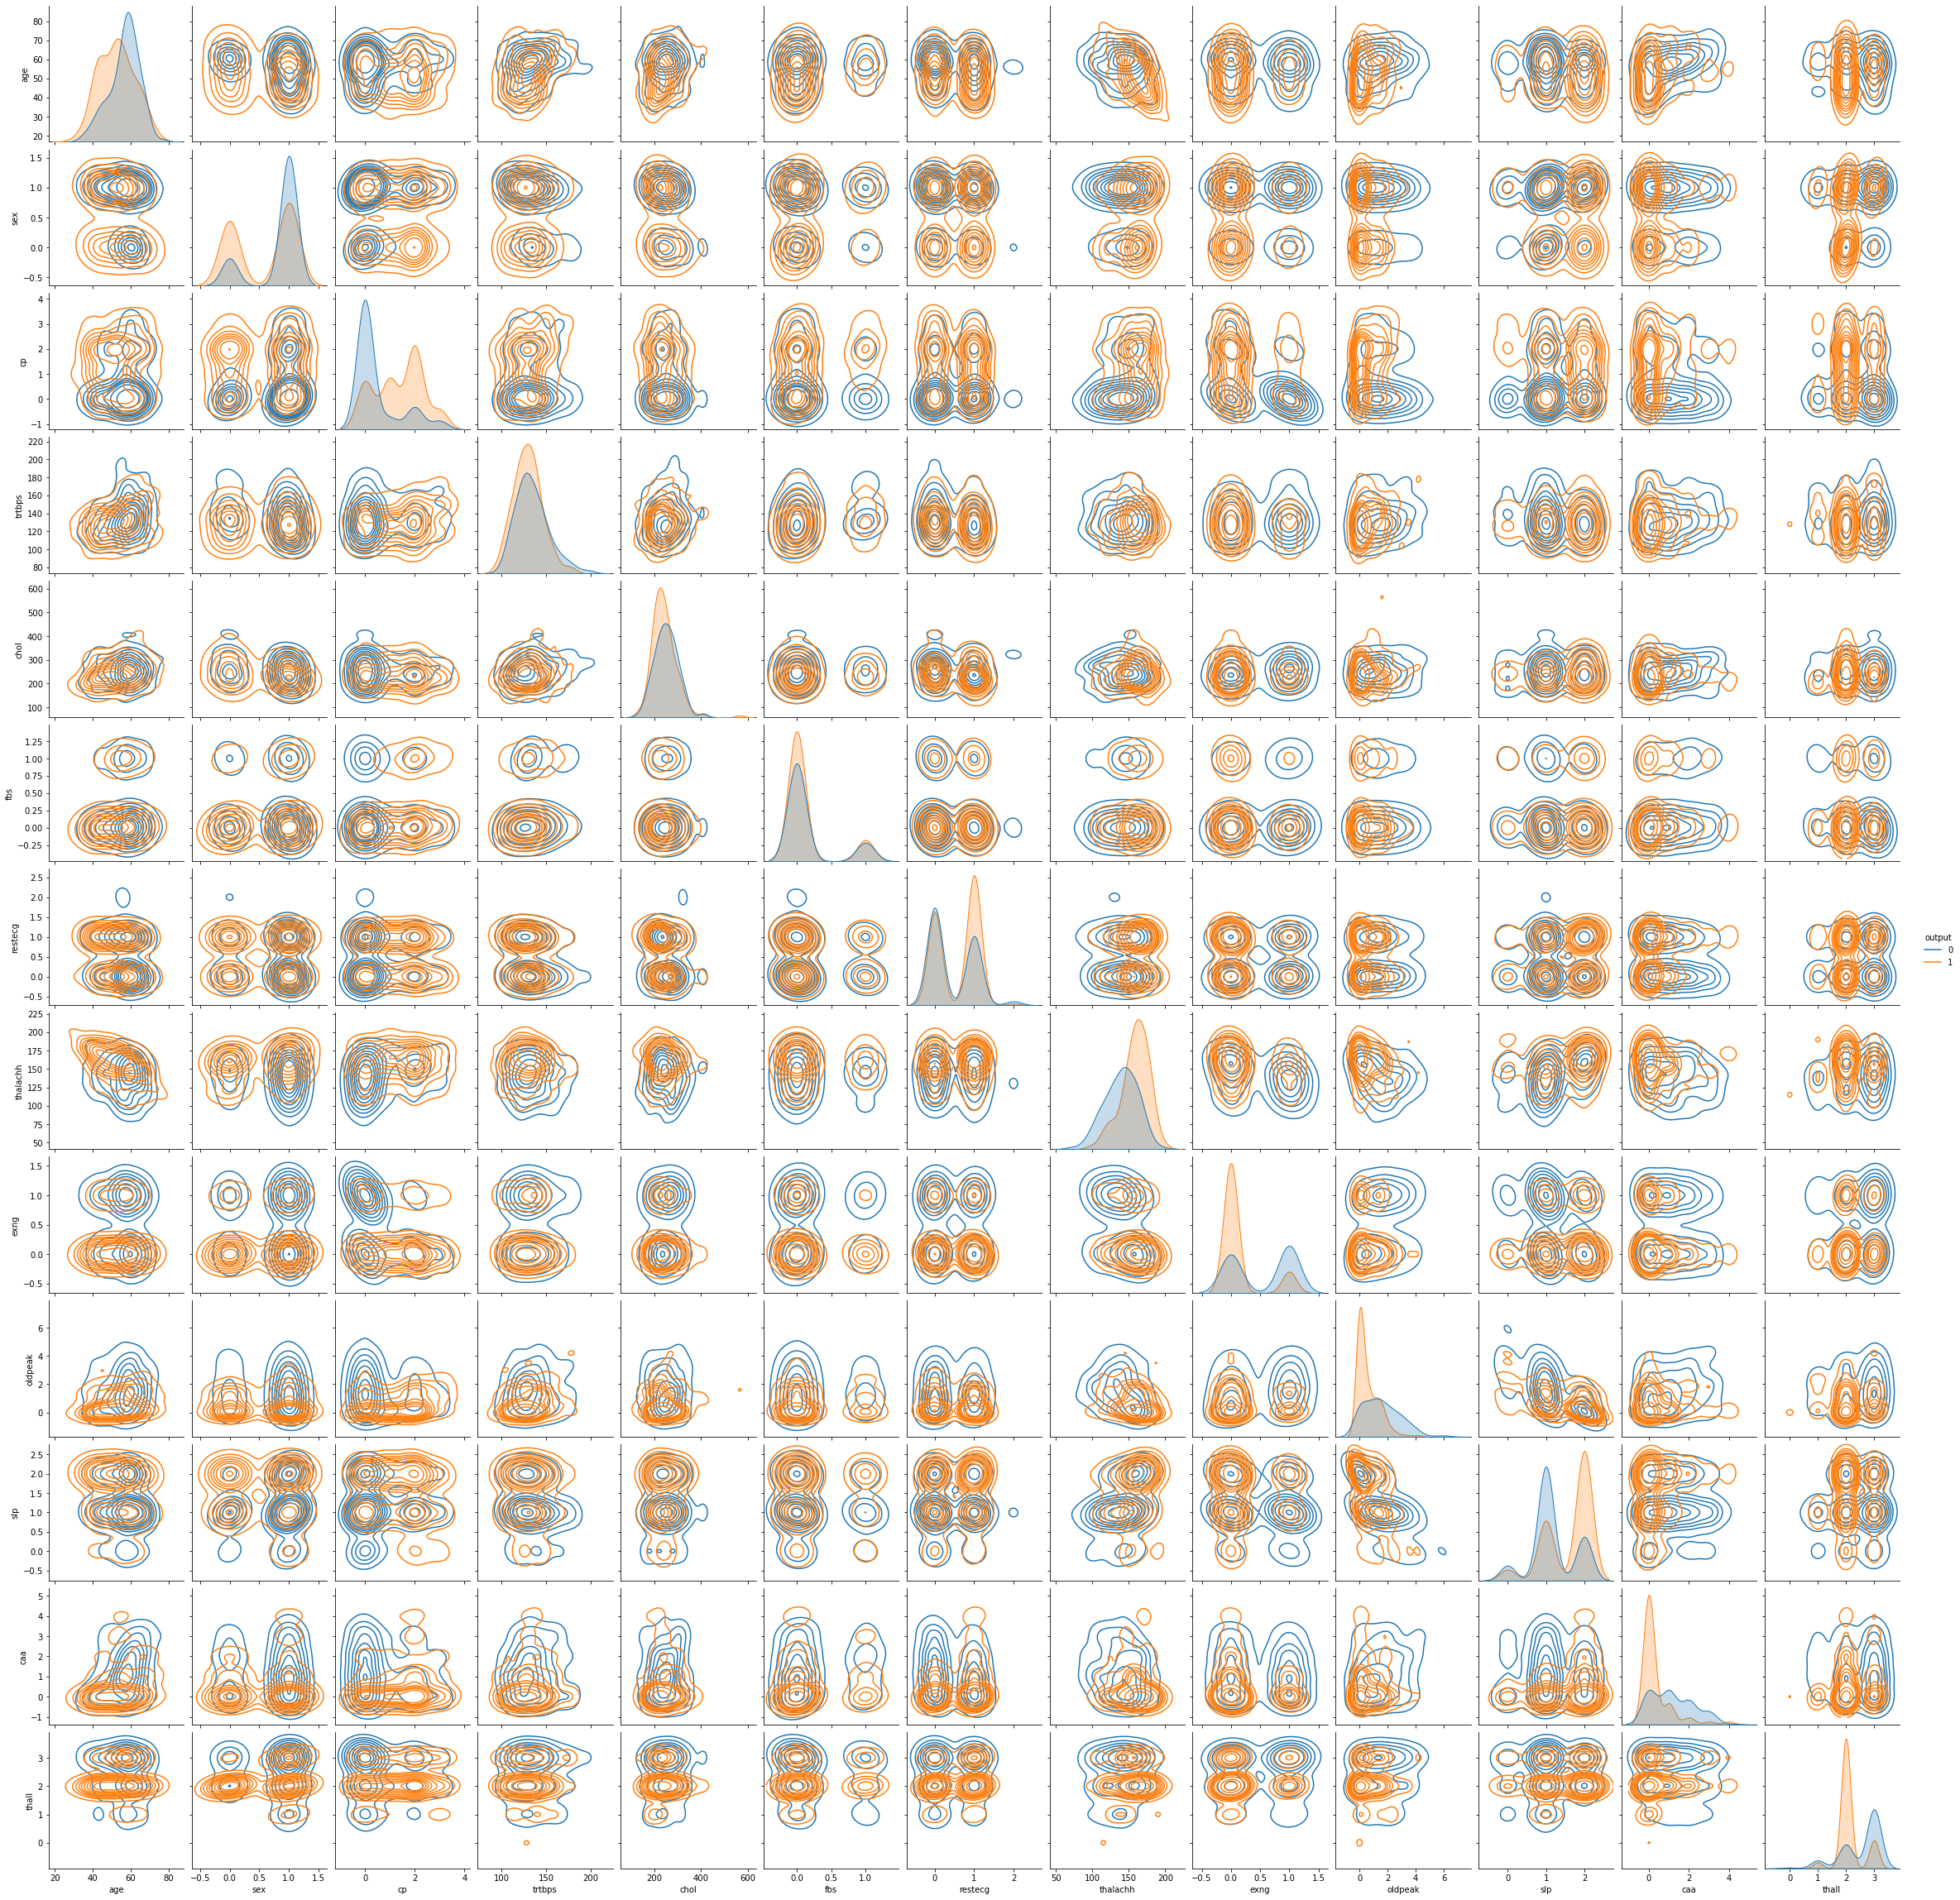

In [86]:
sns.pairplot(df,kind="kde",hue="output")

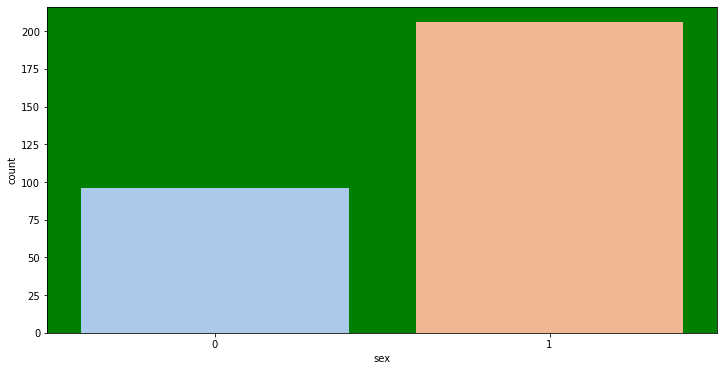

In [87]:
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_facecolor("green")
p = sns.countplot(data=df, x="sex", palette='pastel')

The number of people belonging to sex category 0 are 96 whereas 1 are 206.

The number of people in one category are more than double than the zero

<AxesSubplot:xlabel='fbs', ylabel='count'>

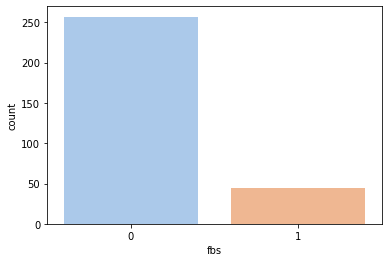

In [88]:
sns.countplot(x='fbs', data=df, palette='pastel')

People of fasting blood sugar > 120 mg/dl is true / "1" are less than 25% of people of fasting blood sugar > 120 mg/dl is false / "0".

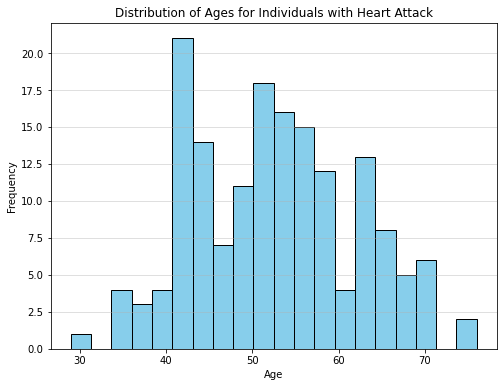

In [89]:
heart_attack_data = df[df['output'] == 1]

plt.figure(figsize=(8, 6))
plt.hist(heart_attack_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages for Individuals with Heart Attack')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

Age from 40-60 years have the high chance of heart attack.

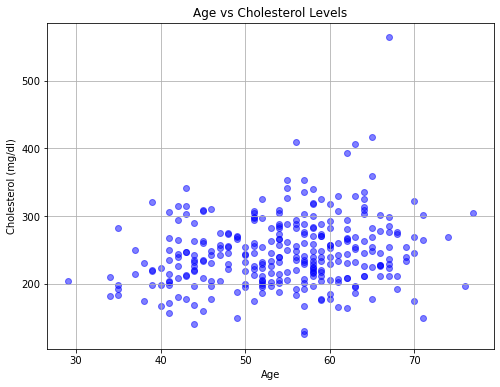

Correlation between age and cholesterol: 0.2072155056561174


In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['chol'], alpha=0.5, color='blue')
plt.title('Age vs Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.grid(True)
plt.show()
correlation = df['age'].corr(df['chol'])
print(f"Correlation between age and cholesterol: {correlation}")

The correlation of 0.207 between age and cholesterol levels indicates a weak relationship between these two variables in the dataset. 

In this context, the positive correlation suggests a very slight tendency where older age is slightly associated with marginally higher cholesterol levels, or vice versa. However, this relationship isn't strong enough to provide a definitive prediction.

It's important to note that correlation doesn't imply causation, and other factors may influence an individual's cholesterol levels beyond age alone. Nonetheless, a correlation value above 0 indicates a connection, albeit weak, between age and cholesterol levels within that dataset.

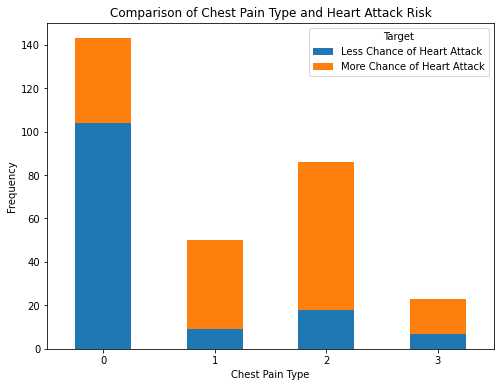

In [91]:
cp_target_counts = df.groupby(['cp', 'output']).size().unstack()

# Plotting a stacked bar chart
cp_target_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Comparison of Chest Pain Type and Heart Attack Risk')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Target', labels=['Less Chance of Heart Attack', 'More Chance of Heart Attack'])
plt.show()


Individuals experiencing Typical Angina Chest Pain have a **lesser** chance of a heart attack, 

whereas those with Atypical Angina, Non-Anginal Pain, and Asymptomatic Pain tend to have a **higher** chance of experiencing a heart attack.

In [92]:
X=df.drop(["output"],axis=1)
y=df["output"]

In [93]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [95]:
model_LR = LogisticRegression(random_state=9)
model_KNN = KNeighborsClassifier()
model_SVC = SVC()
model_RF = RandomForestClassifier()
model_XGB = xgb.XGBClassifier()
model_GNB = GaussianNB()  
model_BNB = BernoulliNB()

# Training and evaluating each model separately
models = [
    ("XGBClassifier", model_XGB),
    ("KNeighborsClassifier", model_KNN),
    ("LogisticRegression", model_LR),
    ("GaussianNB", model_GNB),
    ("BernoulliNB", model_BNB),
    ("SVC", model_SVC),
    ("RandomForestClassifier", model_RF)
]

predicted = []

for name, algo in models:
    model = algo
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name, acc)

XGBClassifier 0.7704918032786885
KNeighborsClassifier 0.819672131147541
LogisticRegression 0.8032786885245902
GaussianNB 0.7540983606557377
BernoulliNB 0.7704918032786885
SVC 0.7540983606557377
RandomForestClassifier 0.8032786885245902


Numeric Variables - No outliers were found!

chest pain type with Atypical Angina, Non-Anginal Pain, and Asymptomatic Pain tend to high chance of heart attack

Cholesterol and age are related but the relationship is not strong, indicating the presence of other factors influencing it.

Age from 40-60 years have the high chance of heart attack.

gender category 1 has more chance of heart attack compared to gender category 0.

accuracy from 7 classifier is between 0.7-0.8